In [175]:
# 任务位置  1600，280   1800，340
first_task_box = [1530,260,1900,370]

In [171]:
import os
import random
from datetime import datetime,date

def tap_screen(x, y):
    os.system('adb shell input tap {} {}'.format(x, y))

def screen_position(box):
    x1,y1,x2,y2 = box
    x = random.randint(x1,x2)
    y = random.randint(y1,y2)
    print(x)
    print(y)
    return x,y


def mkdir_for_screenshot(dir='dhxy_xu'):
    dir_p = os.popen(f"adb shell ls /mnt/sdcard/ |findstr {dir}").read()
    if dir_p:
        print(f'{dir_p}exists!')
    else:
        print('mkdir!')
        os.system(f'adb shell mkdir /mnt/sdcard/{dir}/')

def pull_screenshot(filename=None):
    if not filename:
        filename = datetime.now().strftime('%Y_%m_%d_%H%M%S')
    screenshot = os.system(f'adb shell screencap -p /mnt/sdcard/dhxy_xu/{filename}.png')
    os.system(f'adb pull /mnt/sdcard/dhxy_xu/{filename}.png ./pic/')  

In [13]:
x,y = first_task_position()
tap_screen(x,y)

In [213]:
pull_screenshot('shici2')

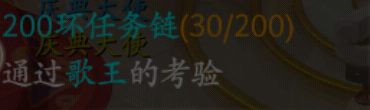

In [201]:
from PIL import Image
img = Image.open('./pic/question2.png')
# 1530,260   1890,310
new_img = img.crop(box=first_task_box)
new_img_path = img.filename[:-4] + 't' + img.filename[-4:]
new_img
new_img.save(new_img_path)

In [142]:
mkdir_for_screenshot()

dhxy_xu
exists!


In [149]:
import sys
from importlib import reload
sys.path.append('..')
import mysetting
reload(mysetting)

<module 'mysetting' from '..\\mysetting.py'>

In [151]:
from aip import AipOcr

App_Id = mysetting.voice_app_id
API_Key = mysetting.voice_api_key
Secret_Key = mysetting.voice_secret_key

client = AipOcr(App_Id, API_Key, Secret_Key)

In [191]:
""" 读取图片 """
def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()

image = get_file_content('./pic/test.png')
words = client.general(image)
words
[i['words'] for i in words['words_result']]

' 读取图片 '

{'log_id': 2883973484798040969,
 'words_result_num': 2,
 'words_result': [{'location': {'width': 289,
    'top': 8,
    'left': 0,
    'height': 36},
   'words': '200环任务链(30/200'},
  {'location': {'width': 227, 'top': 51, 'left': 0, 'height': 41},
   'words': '通过歌王的考验'}]}

['200环任务链(30/200', '通过歌王的考验']

In [204]:
a_box = [870,170,1040,220]

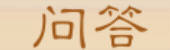

' 读取图片 '

{'log_id': 8624623843512568169,
 'words_result_num': 1,
 'words_result': [{'location': {'width': 114,
    'top': 0,
    'left': 41,
    'height': 49},
   'words': '问答'}]}

['问答']

In [210]:
from PIL import Image
img = Image.open('./pic/shici.png')
# 1530,260   1890,310
new_img = img.crop(box=a_box)
new_img_path = img.filename[:-4] + '_t' + img.filename[-4:]
new_img
new_img.save(new_img_path)
""" 读取图片 """
def get_file_content(filePath):
    with open(filePath, 'rb') as fp:
        return fp.read()

image = get_file_content('./pic/shici_t.png')
words = client.general(image)
words
[i['words'] for i in words['words_result']]